In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
#add the latitudes and longitudes into a list
coordinates = list(lat_lngs)

In [4]:
#import citipy
from citipy import citipy


In [5]:
#create a list for holding the cities
cities = []

#identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

613

In [6]:
#import requests library 
import requests

#import weather_api_key
from config import weather_api_key

#build basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#import datetime module from datetime library
from datetime import datetime

In [7]:
#create empty list to hold weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
#loop through all cities in the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    #add 1 to the record count
    record_count += 1
    
    #run API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    #if an error is experienced, skip the city
    except:
        print('City not found.  Skipping...')
        pass
    
#indicate that the data loading is complete
print("-------------------------")
print("Data retrieval complete  ")
print("-------------------------")


    
            

Processing record 1 of set 1 | la romana
Processing record 2 of set 1 | taolanaro
City not found.  Skipping...
Processing record 3 of set 1 | lagunas
Processing record 4 of set 1 | mutsu
Processing record 5 of set 1 | bluff
Processing record 6 of set 1 | rikitea
Processing record 7 of set 1 | nabire
Processing record 8 of set 1 | hermanus
Processing record 9 of set 1 | ushuaia
Processing record 10 of set 1 | linqing
Processing record 11 of set 1 | new norfolk
Processing record 12 of set 1 | busselton
Processing record 13 of set 1 | ati
Processing record 14 of set 1 | berlevag
Processing record 15 of set 1 | hobart
Processing record 16 of set 1 | slave lake
Processing record 17 of set 1 | lompoc
Processing record 18 of set 1 | olutanga
Processing record 19 of set 1 | grand river south east
City not found.  Skipping...
Processing record 20 of set 1 | fort wellington
Processing record 21 of set 1 | mataura
Processing record 22 of set 1 | hambantota
Processing record 23 of set 1 | mahebour

Processing record 38 of set 4 | samusu
City not found.  Skipping...
Processing record 39 of set 4 | san lorenzo
Processing record 40 of set 4 | the pas
Processing record 41 of set 4 | tabiauea
City not found.  Skipping...
Processing record 42 of set 4 | lafiagi
Processing record 43 of set 4 | qaanaaq
Processing record 44 of set 4 | clyde river
Processing record 45 of set 4 | charagua
Processing record 46 of set 4 | samalaeulu
City not found.  Skipping...
Processing record 47 of set 4 | grand island
Processing record 48 of set 4 | malatya
Processing record 49 of set 4 | tabialan
City not found.  Skipping...
Processing record 50 of set 4 | airai
Processing record 1 of set 5 | plettenberg bay
Processing record 2 of set 5 | cherskiy
Processing record 3 of set 5 | beyneu
Processing record 4 of set 5 | dwarka
Processing record 5 of set 5 | altamira
Processing record 6 of set 5 | rio cauto
Processing record 7 of set 5 | dhidhdhoo
Processing record 8 of set 5 | the valley
Processing record 9 o

Processing record 24 of set 8 | constitucion
Processing record 25 of set 8 | salalah
Processing record 26 of set 8 | salamanca
Processing record 27 of set 8 | brigantine
Processing record 28 of set 8 | synya
Processing record 29 of set 8 | kitgum
Processing record 30 of set 8 | neyshabur
Processing record 31 of set 8 | carballo
Processing record 32 of set 8 | isiro
Processing record 33 of set 8 | kudahuvadhoo
Processing record 34 of set 8 | dzilam gonzalez
Processing record 35 of set 8 | kolodenka
Processing record 36 of set 8 | nanortalik
Processing record 37 of set 8 | goundi
Processing record 38 of set 8 | queenstown
Processing record 39 of set 8 | kadnikov
Processing record 40 of set 8 | tshikapa
Processing record 41 of set 8 | cabo san lucas
Processing record 42 of set 8 | sioux lookout
Processing record 43 of set 8 | jining
Processing record 44 of set 8 | coihaique
Processing record 45 of set 8 | mayo
Processing record 46 of set 8 | mochalishche
Processing record 47 of set 8 | ty

Processing record 15 of set 12 | belmonte
Processing record 16 of set 12 | kampong chhnang
Processing record 17 of set 12 | barbar
City not found.  Skipping...
Processing record 18 of set 12 | gornopravdinsk
Processing record 19 of set 12 | nhulunbuy
Processing record 20 of set 12 | westport
Processing record 21 of set 12 | etaples
Processing record 22 of set 12 | gizo
Processing record 23 of set 12 | yokadouma
Processing record 24 of set 12 | ordu
Processing record 25 of set 12 | scarborough
Processing record 26 of set 12 | katherine
Processing record 27 of set 12 | karamken
City not found.  Skipping...
Processing record 28 of set 12 | coos bay
Processing record 29 of set 12 | ishinomaki
Processing record 30 of set 12 | puerto montt
Processing record 31 of set 12 | katha
City not found.  Skipping...
Processing record 32 of set 12 | ormara
Processing record 33 of set 12 | necochea
Processing record 34 of set 12 | talcahuano
Processing record 35 of set 12 | talara
Processing record 36 o

In [9]:
len(city_data)

566

In [10]:
#convert list into dataframe
city_df = pd.DataFrame(city_data)
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Romana,18.4273,-68.9728,87.89,54,54,16.24,DO,2021-07-27 21:00:17
1,Lagunas,-5.2269,-75.6753,87.82,55,92,2.48,PE,2021-07-27 21:03:07
2,Mutsu,41.2894,141.2169,73.00,97,95,10.76,JP,2021-07-27 21:03:07
3,Bluff,-46.6000,168.3333,48.79,70,16,15.82,NZ,2021-07-27 21:03:07
4,Rikitea,-23.1203,-134.9692,74.48,77,100,15.10,PF,2021-07-27 21:03:08
5,Nabire,-3.3667,135.4833,76.50,87,100,3.36,ID,2021-07-27 20:59:12
6,Hermanus,-34.4187,19.2345,55.80,77,99,19.51,ZA,2021-07-27 21:03:08
7,Ushuaia,-54.8000,-68.3000,35.65,92,100,6.31,AR,2021-07-27 21:00:16
8,Linqing,36.8456,115.7117,72.95,96,100,9.46,CN,2021-07-27 21:03:09
9,New Norfolk,-42.7826,147.0587,53.10,74,92,1.01,AU,2021-07-27 21:03:09


In [11]:
#re-order columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_df[new_column_order]

city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Romana,DO,2021-07-27 21:00:17,18.4273,-68.9728,87.89,54,54,16.24
1,Lagunas,PE,2021-07-27 21:03:07,-5.2269,-75.6753,87.82,55,92,2.48
2,Mutsu,JP,2021-07-27 21:03:07,41.2894,141.2169,73.00,97,95,10.76
3,Bluff,NZ,2021-07-27 21:03:07,-46.6000,168.3333,48.79,70,16,15.82
4,Rikitea,PF,2021-07-27 21:03:08,-23.1203,-134.9692,74.48,77,100,15.10
5,Nabire,ID,2021-07-27 20:59:12,-3.3667,135.4833,76.50,87,100,3.36
6,Hermanus,ZA,2021-07-27 21:03:08,-34.4187,19.2345,55.80,77,99,19.51
7,Ushuaia,AR,2021-07-27 21:00:16,-54.8000,-68.3000,35.65,92,100,6.31
8,Linqing,CN,2021-07-27 21:03:09,36.8456,115.7117,72.95,96,100,9.46
9,New Norfolk,AU,2021-07-27 21:03:09,-42.7826,147.0587,53.10,74,92,1.01


In [12]:
#create output CSV file
output_data_file = "weather_data/cities.csv"
#export the city_data into CSV
city_df.to_csv(output_data_file, index_label="City_ID")


In [13]:
#extract relevant fields from the DataFrame for plotting
lats = city_df['Lat']
max_temps = city_df['Max Temp']
humidity = city_df['Humidity']
cloudiness = city_df['Cloudiness']
wind_speed = city_df['Wind Speed']

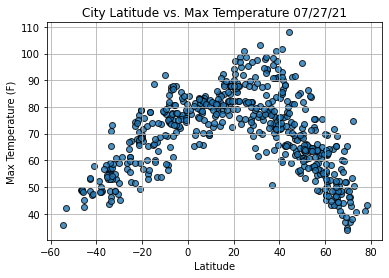

In [16]:
#import time module
import time

#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

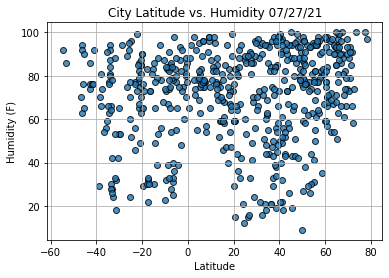

In [17]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

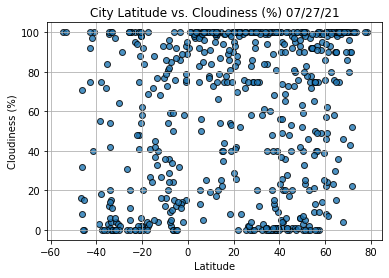

In [18]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

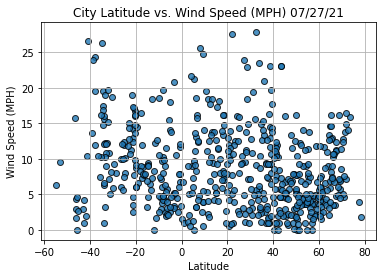

In [19]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (MPH) ' + time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()